In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day10\milk.csv", index_col =0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


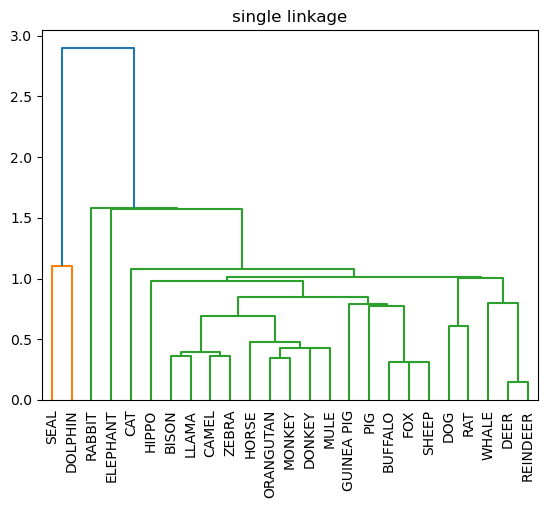

In [3]:
#scaling of df
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)

#dendrogram using single linkage
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

In [4]:
#with 3 clusters 
clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scaled)

print(clust.labels_)

df_clust = df.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

print(silhouette_score(df_scaled, clust.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 2 2]
0.5391595072079529


In [5]:
#finding best silhouette score and no of clusters using AgglomerativeClustering
Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 3
Best Score: 0.5391595072079529


In [6]:
#pca performed
pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_ * 100)

[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]


In [7]:
#labels
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

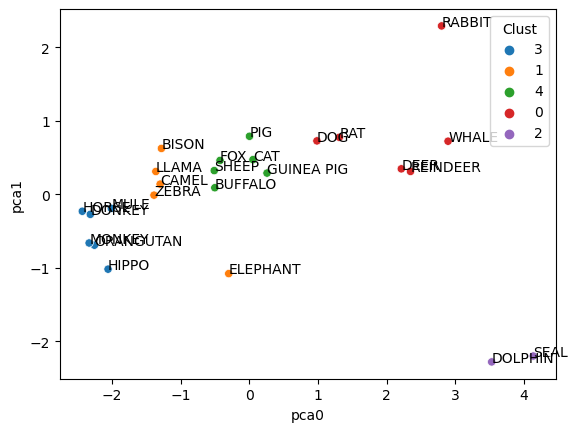

In [8]:
sns.scatterplot(data = principalComponents, x='pca0', y='pca1',
                hue='Clust')
for i in range(0, df.shape[0] ):
    plt.text(principalComponents.values[i,0], 
             principalComponents.values[i,1], 
             list(df.index)[i])
plt.show()